<a href="https://colab.research.google.com/github/galileo15640215/RNN/blob/master/keras_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[-3.14159265]
 [-3.01336438]
 [-2.88513611]
 [-2.75690784]
 [-2.62867957]
 [-2.5004513 ]
 [-2.37222302]
 [-2.24399475]
 [-2.11576648]
 [-1.98753821]
 [-1.85930994]
 [-1.73108167]
 [-1.60285339]
 [-1.47462512]
 [-1.34639685]
 [-1.21816858]
 [-1.08994031]
 [-0.96171204]
 [-0.83348377]
 [-0.70525549]
 [-0.57702722]
 [-0.44879895]
 [-0.32057068]
 [-0.19234241]
 [-0.06411414]
 [ 0.06411414]
 [ 0.19234241]
 [ 0.32057068]
 [ 0.44879895]
 [ 0.57702722]
 [ 0.70525549]
 [ 0.83348377]
 [ 0.96171204]
 [ 1.08994031]
 [ 1.21816858]
 [ 1.34639685]
 [ 1.47462512]
 [ 1.60285339]
 [ 1.73108167]
 [ 1.85930994]
 [ 1.98753821]
 [ 2.11576648]
 [ 2.24399475]
 [ 2.37222302]
 [ 2.5004513 ]
 [ 2.62867957]
 [ 2.75690784]
 [ 2.88513611]
 [ 3.01336438]
 [ 3.14159265]]


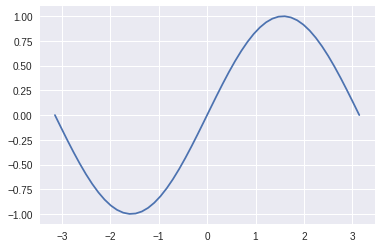

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi).reshape(-1, 1)
t = np.sin(x)

print(x)

%matplotlib inline
plt.plot(x, t)
plt.show()

In [8]:
from keras.models import Sequential
from keras.layers import Dense

batch_size = 8 #バッチサイズ
n_in = 1 #入力層のニューロン数
n_mid = 20 #中間層のニューロン数
n_out = 1 #出力層のニューロン数

#入力層、中間層、出力層の3層のニューラルネットワークを構築、
model = Sequential()
model.add(Dense(n_mid, input_shape=(n_in,), activation='sigmoid')) #活性化関数にシグモイド関数
model.add(Dense(n_out, activation='linear')) #活性化関数に恒等関数
model.compile(loss='mean_squared_error', optimizer='sgd') #損失関数に二乗誤差、最適化アルゴリズムにSGDを使用してニューラルネットワークを構築する
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
history = model.fit(x, t, batch_size=batch_size, epochs=2000, validation_split=0.1) #10%のデータを検証用に使う

Instructions for updating:
Use tf.cast instead.
Train on 45 samples, validate on 5 samples
Epoch 1/2000
45/45 [==============================] - 1s 11ms/step - loss: 1.0213 - val_loss: 0.2293
Epoch 2/2000
45/45 [==============================] - 0s 214us/step - loss: 0.4832 - val_loss: 0.0442
Epoch 3/2000
45/45 [==============================] - 0s 192us/step - loss: 0.3315 - val_loss: 0.0483
Epoch 4/2000
45/45 [==============================] - 0s 186us/step - loss: 0.2943 - val_loss: 0.0651
Epoch 5/2000
45/45 [==============================] - 0s 172us/step - loss: 0.2772 - val_loss: 0.0945
Epoch 6/2000
45/45 [==============================] - 0s 157us/step - loss: 0.2581 - val_loss: 0.1294
Epoch 7/2000
45/45 [==============================] - 0s 156us/step - loss: 0.2432 - val_loss: 0.1479
Epoch 8/2000
45/45 [==============================] - 0s 224us/step - loss: 0.2305 - val_loss: 0.1972
Epoch 9/2000
45/45 [==============================] - 0s 205us/step - loss: 0.2224 - val_loss:

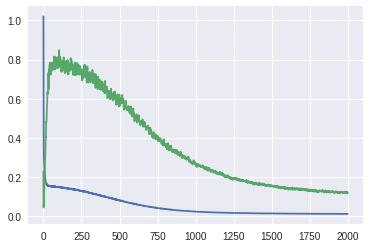

In [10]:
loss = history.history['loss']
vloss = history.history['val_loss']

plt.plot(np.arange(len(loss)), loss)
plt.plot(np.arange(len(vloss)), vloss)
plt.show()

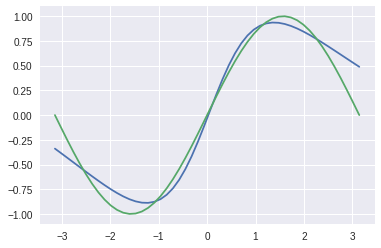

In [11]:
plt.plot(x, model.predict(x))
plt.plot(x, t)
plt.show()